# 1.7 Inicialização dos Pesos

## Bem vind@s ao mundo estocástico!

Vimos que redes neurais são um formadas por um conjunto de parâmetros chamados de **pesos** e **bias**. 

> Não confunda **parâmetros** com **hiperparâmetros**. Parâmetros são os valores que sua rede aprende (pesos e bias). Hiperparâmetros são os valores relacionados ao treinamento da sua rede: *learning rate*, número de camadas/neurônios, função de ativação de cada camada, etc...

Nós também vimos que os pesos e bias são, em geral, inicializados com valores aleatórios. Por conta disso, é muito díficil que duas redes distintas chegem no mesmo resultado. Além disso, nós nunca teremos certeza que tal resultado é o melhor possível (mínimo global) e, dependendo dos valores iniciais, uma rede pode nunca convergir.

Claro que, para evitar alguns desses problemas, nós podemos mexer nos hiperparâmetros como *learning rate*, o otimizador, adicionar momentum, entre outros. Se você não conhece sobre eles ainda, não se preocupe! Nós vamos falar sobre eles mais a frente nesse curso. Outra alternativa é inicializar os pesos de diferentes maneiras. E aí, vamos aprender sobre elas?

## Inicialização com Zeros

> "Eu prefiro lutar em 0 graus, pois não é nem quente, nem frio!" <br> Maguila (ex-lutador de boxe)

Baseado nesse pensamento, muitas pessoas já pensaram em inicializar os pesos com zero. Dessa forma, todos os pesos começarão com valores iguais, nenhum sendo mais importante que o outro, nem dando mais importância para um determinado atributo dos seus dados. Além disso, é muito simples fazer isso com numpy:

In [1]:
import numpy as np

pesos = np.zeros(shape=(3, 3))
pesos

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Parece uma boa ideia, né? <font color='red'>**Errado!**</font> **Essa é pior coisa que se pode fazer ao inicializar os pesos de uma rede neural!** Parando para pensar um pouco melhor, fazendo isso nós vamos zerar todos os neurônios bem como os gradientes de aprendizagem. **Se os gradientes são zeros, como a rede vai aprender alguma coisa, então?** 
Vale salientar que seus gradientes podem tender a zero por outras razões (que nós veremos depois). Mas, quando isso acontece, chamamos esse fenômeno de **desaparecimento dos gradientes** (*gradient vanishing*).

Sem contar que você será mal visto pela sua família e amigos se inicializar seus pesos com zeros. Em outras palavras, não pense como o Maguila e não faça isso nunca!

## Inicialização com 1s

Nesse momento, você deve estar pensando: "Tá bom, tá bom. Eu já entendi que inicializar todos os pesos com zero é ruim. Mas, e se inicializamos todos os pesos com 1s, então?" 

A resposta é: **é tão ruim quanto!** Pensando um pouquinho, lembra que na primeira camada todos os neurônios recebem as mesmas entradas? Então, se todos os neurônios receberam as mesmas entradas e todos eles tem o mesmo valor de peso (=1), o que que vai acontecer? Isso mesmo: **todos os neurônios vão dar o mesmo resultado!** 

Ainda nessa linha de pensamento, como todos os neurônios vão da próxima camada vão receber o resultado de cada neurônio dessa camada (que são todos iguais), a mesma coisa vai se repetir. No fim das contas, você pode até ter um pouquinho de gradiente, mas os gradientes para os neurônios de uma mesma camada vão ser iguais. Assim, seus neurônios vão continuar sem aprender muita coisa.

> Resumindo até aqui: **não inicialize os seus neurônios com o mesmo valor, pior ainda se esse valor for igual a zero!**

Se você entendeu isso, deve ter percebido que a melhor maneira de inicializar pesos é dando valores aleatórios para cada um deles. A pergunta agora é: será que é melhor uma variância baixa, alta? Será que a média deve ser zero? É melhor uma distribuição normal ou uniforme?

É isso que vamos ver nas próximas seções.

## Inicialização aleatória uniforme

Inicializar os pesos aleatórios de forma uniforme (mesma probabilidade para todo mundo) é fácil com numpy:

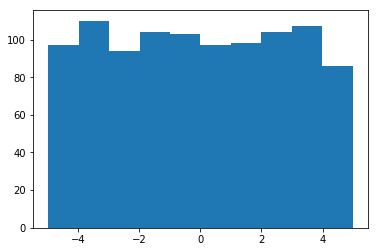

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

pesos_uniforme = 10*np.random.rand(1000) - 5 # pesos entre -5 e 5
plt.hist(pesos_uniforme)
plt.show()

Repare que como os valores dos pesos têm praticamente uma mesma probabilidade de ocorrência (distribuição uniforme). **Pesos como essa distribuição são bons para quebrar a simetria da rede e vão fazer sua rede aprender alguma coisa**.

## Inicialização aleatória normal

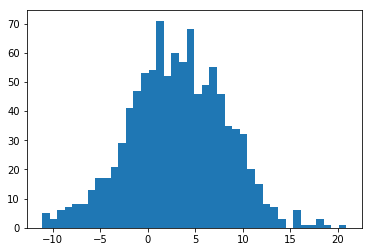

In [3]:
pesos_normal = 5*np.random.randn(1000) + 3 # média = 3 e desvio-padrão = 5

plt.hist(pesos_normal, bins=40)
plt.show()

Diferente da distribuição uniforme, os pesos agora são inicializados por uma distribuição normal, isto é, com certa média e desvio padrão. Ou seja, pesos mais próximos da média são mais comuns e quanto mais "desvios-padrões" além da média, menor a probabilidade. Da mesma forma que a distribuição uniforme, **pesos com essa distribuição também são bons para quebrar a simetria da rede**.

## Inicialização Glorot Uniforme

A gente viu que inicilizar os pesos com uma distribuição normal ou uniforme é uma boa ideia. Entretanto, elas apresentam um defeito: **como definir a faixa de valores que meus pesos vão assumir?** Em outras palavras, qual deve ser a variância dos meus pesos? Quanto menor sua variância, maiores são as chances de acontecer o *vanishing* dos gradientes - e a gente já viu que isso não é bom. Por outro lado, quando a variância é muito grande, o contrário acontece. Isto é, seus gradientes vão tender ao infinito. Nesse caso, damos o nome de **explosão dos gradientes** (*exploding gradients*). Portanto, tenha em mente o seguinte:

> O que buscamos na inicialização de pesos são **valores pequenos com variância ok** (pequena, mas nem tanto)

Porém, não existe um número mágico para variância dos pesos. Ela vai depender principalmente da quantidade de pesos que a sua rede tem, ou seja, depende da arquitetura da sua rede. O ideal seria que a variância dos pesos fosse definida automaticamente. Ahhh, ia ser tão bom se existisse um método que fizesse isso para gente, né? E existe!!!

A **Glorot Uniforme**, também conhecida como **Xavier Uniforme**, é uma distribuição uniforme que leva em consideração a quantidade de neurônios da camada atual e anterior da sua rede. Na prática, os pesos são inicializados baseados na seguinte fórmula:

$$w = 2*\sigma*rand() - \sigma$$

onde,

$$\sigma = \sqrt{\frac{6}{in + out}}$$

Supondo que a camada atual tem 5 neurônios e a camada anterior tinha 3, a implementação em Python ficaria dessa forma:

In [4]:
np.random.seed(42) # para que o seu resultado seja igual ao meu :)

sigma = np.sqrt(6 / (5 + 3))
pesos = 2 * sigma * np.random.rand(5, 3) - sigma
print(pesos)

[[-0.21730289  0.78066008  0.40182529]
 [ 0.17088151 -0.59579319 -0.59583497]
 [-0.76542164  0.63423569  0.17513634]
 [ 0.36039228 -0.83037201  0.81390774]
 [ 0.57580754 -0.49824328 -0.55109532]]


## Inicialização Glorot Normal

A **Glorot Normal**, também conhecida como **Xavier Normal**, é bem parecida com a sua irmã uniforme. A diferença, na verdade, é que agora vamos fazer a amostragem dos pesos baseado numa distribuição normal ~~(não diga!)~~, também levando em consideração a quantidade de neurônios da camada atual e anterior:

$$w = \sigma * randN()$$

também teremos uma pequena diferençazinha no $\sigma$:

$$\sigma = \sqrt{\frac{2}{in + out}}$$

Em Python, considerando a mesma rede com 5 e 3 neurônios:

In [5]:
np.random.seed(42) # mesma semente do exemplo anterior para gente comparar os pesos

sigma = np.sqrt(2 / (5 + 3))
pesos = sigma * np.random.randn(5, 3)
print(pesos)

[[ 0.24835708 -0.06913215  0.32384427]
 [ 0.76151493 -0.11707669 -0.11706848]
 [ 0.78960641  0.38371736 -0.23473719]
 [ 0.27128002 -0.23170885 -0.23286488]
 [ 0.12098114 -0.95664012 -0.86245892]]


Pronto! Agora você sabe tudo sobre inicialização de pesos em redes neurais. Provavelmente, a sua única dúvida na cabeça agora é: **da onde vem o $2$ e $6$ nas fórmulas do $\sigma$ das distribuições Glorot?** A verdade é que, no [artigo original](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf), os autores testaram diversos valores em diversas redes e simplesmente esses valores levaram aos melhores resultados. É, meus amigos e amigas, esse é o mundo da redes neurais: tentativa e erro!